In [33]:
from diff_eqn import *
import numpy as np
import matplotlib.pyplot as plt
from math import exp

In [34]:
from Root_find_lib import *

In [35]:
def CosmoBoltzSolver(k,step=0.01):
    h=0.677;Odm=0.11928/h**2;Om=0.3106;Or=4.15*10**(-5)/(h**2);Ol=0.6894;aeq=4.15*10**(-5)/(Om*h**2);H0=100*h
    H= lambda a: H0*np.sqrt(Om/a**3+Or/a**4+Ol+(1-Om-Or-Ol)/a**2)
    RHS=[lambda Y,lna:-2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2)-k*Y[4]/(np.exp(lna)**1*H(np.exp(lna))),
     lambda Y,lna: 2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)-(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]+H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
     lambda Y,lna: -k/(np.exp(lna)**1*H(np.exp(lna)))*Y[1]-Y[2],
     lambda Y,lna:-6*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(3+k**2/(1*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-k*Y[2]/(np.exp(lna)**1*H(np.exp(lna)))-3*H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
     lambda Y,lna: k*Y[0]/(3*np.exp(lna)*H(np.exp(lna)))-k*Y[1]/(3*np.exp(lna)*H(np.exp(lna)))]
    lna0=-20
    Y0=[[1/3],[1],[0],[1],[0]]
    sol=RK4_solve_system(RHS,lna0,Y0,step,int(20/step))
    return(sol)
    

In [36]:
sol1=CosmoBoltzSolver(200,step=0.01)

In [37]:
sol2=CosmoBoltzSolver(2000,step=0.001)

In [38]:
sol3=CosmoBoltzSolver(20000,step=0.001)

C:\Users\sudip\AppData\Local\Temp\ipykernel_11376\1079286389.py:7: RuntimeWarning: overflow encountered in scalar multiply
  lambda Y,lna:-6*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(3+k**2/(1*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-k*Y[2]/(np.exp(lna)**1*H(np.exp(lna)))-3*H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2),
C:\Users\sudip\AppData\Local\Temp\ipykernel_11376\1079286389.py:8: RuntimeWarning: overflow encountered in scalar multiply
  lambda Y,lna: k*Y[0]/(3*np.exp(lna)*H(np.exp(lna)))-k*Y[1]/(3*np.exp(lna)*H(np.exp(lna)))]
C:\Users\sudip\AppData\Local\Temp\ipykernel_11376\1079286389.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  RHS=[lambda Y,lna:-2*H0**2*Or*Y[0]/(np.exp(lna)**4*H(np.exp(lna))**2)+(1+k**2/(3*np.exp(lna)**2*H(np.exp(lna))**2))*Y[1]-H0**2*Odm*Y[3]/(2*np.exp(lna)**3*H(np.exp(lna))**2)-k*Y[4]/(np.exp(lna)**1*H(np.exp(lna))),
c:\Users\sudip\Documents\Class\Comp_Phy\Project\diff_eqn.py:146: RuntimeWarning: invalid value encountered

In [39]:
sol4=CosmoBoltzSolver(200000,step=0.001)

C:\Users\sudip\AppData\Local\Temp\ipykernel_11376\1079286389.py:8: RuntimeWarning: overflow encountered in scalar multiply
  lambda Y,lna: k*Y[0]/(3*np.exp(lna)*H(np.exp(lna)))-k*Y[1]/(3*np.exp(lna)*H(np.exp(lna)))]
c:\Users\sudip\Documents\Class\Comp_Phy\Project\diff_eqn.py:151: RuntimeWarning: invalid value encountered in scalar add
  sol[i].append(sol[i][-1]+(K1[i]+2*K2[i]+2*K3[i]+K4[i])/6)
C:\Users\sudip\AppData\Local\Temp\ipykernel_11376\1079286389.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  lambda Y,lna: k*Y[0]/(3*np.exp(lna)*H(np.exp(lna)))-k*Y[1]/(3*np.exp(lna)*H(np.exp(lna)))]


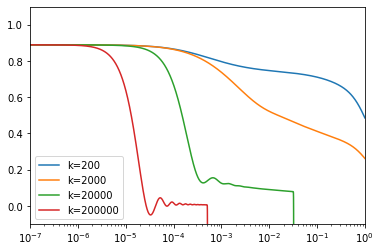

In [40]:
plt.plot(np.exp(sol1[-1]),sol1[1],label='k=200')
plt.plot(np.exp(sol2[-1]),sol2[1],label='k=2000')
plt.plot(np.exp(sol3[-1]),sol3[1],label='k=20000')
plt.plot(np.exp(sol4[-1]),sol4[1],label='k=200000')
plt.ylim(-0.1,1.1)
plt.xlim(1e-7,1)
plt.xscale('log')
plt.legend()

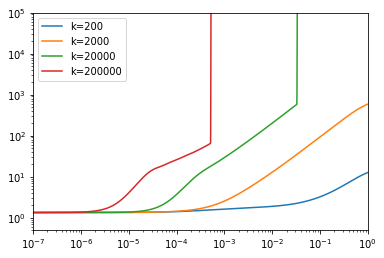

In [41]:
plt.plot(np.exp(sol1[-1]),sol1[3],label='k=200')
plt.plot(np.exp(sol2[-1]),sol2[3],label='k=2000')
plt.plot(np.exp(sol3[-1]),sol3[3],label='k=20000')
plt.plot(np.exp(sol4[-1]),sol4[3],label='k=200000')
plt.ylim(0.5,1e+5)
plt.xlim(1e-7,1)
plt.xscale('log')
plt.yscale('log')
plt.legend()